# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [3]:
df = pd.read_csv("Mall_Customers-M33.csv")

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df['Gender'].unique() #verificando a ortografia

array(['Male', 'Female'], dtype=object)

A base não possui erros ortográficos

In [15]:
df.info() #verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


O tipo dos dados segue de acordo com cada coluna

In [11]:
(df.isnull().sum()/len(df))*100 #verificando porcentagem de valores nulos

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

A base não possui valores nulos que precisam ser tratados

In [13]:
df.describe() #verificando se a base contém outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
medianas = df.select_dtypes(include=['number']).median() #verificando a mediana das colunas.

print(medianas)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64


Os dados possuem uma distribuição normal em cada coluna e a media e a mediana seguem proximas umas das outras indicando que a base não contém outliers

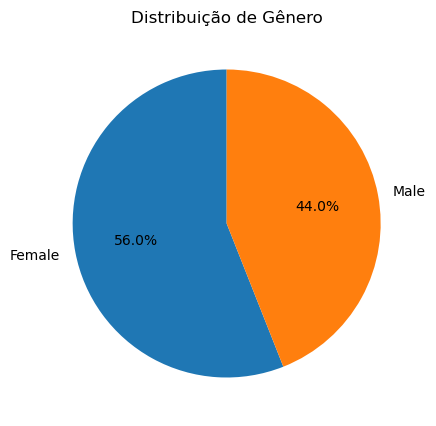

In [6]:
x = df['Gender'].value_counts().index       #reunindo e plotando as informações de gênero
y = df['Gender'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)
plt.title('Distribuição de Gênero')
plt.show()

No gráfico de pizza podemos ver que a maior parte da base de dados é composta por mulheres

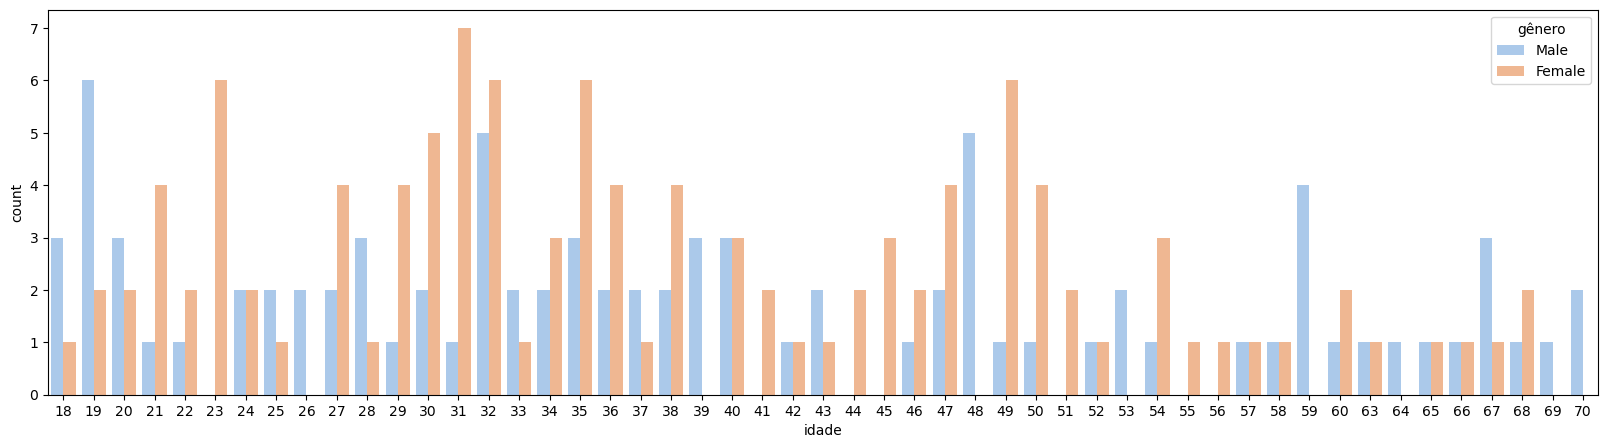

In [59]:
plt.figure(figsize=(20,5))                      #verificando a idade de cada gênero
sns.countplot(x='Age', hue='Gender', data=df, palette='pastel')
plt.xlabel('idade')
plt.legend(title='gênero')
plt.show()

E a maioria dessas mulheres possuem uma idade de 31 anos

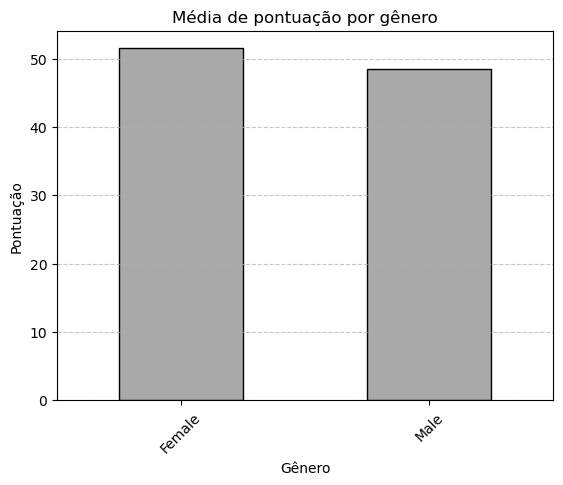

In [5]:
grupo = df.groupby('Gender')['Spending Score (1-100)'].mean()   #agrupando e plotando a media de gastos por gênero

grupo.plot(kind='bar', color='darkgrey', edgecolor='black')
plt.title('Média de pontuação por gênero')
plt.xlabel('Gênero')
plt.ylabel('Pontuação')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nesse gráfico de barras podemos ver que as mulheres possuem a maior media de pontuação de gastos no shopping

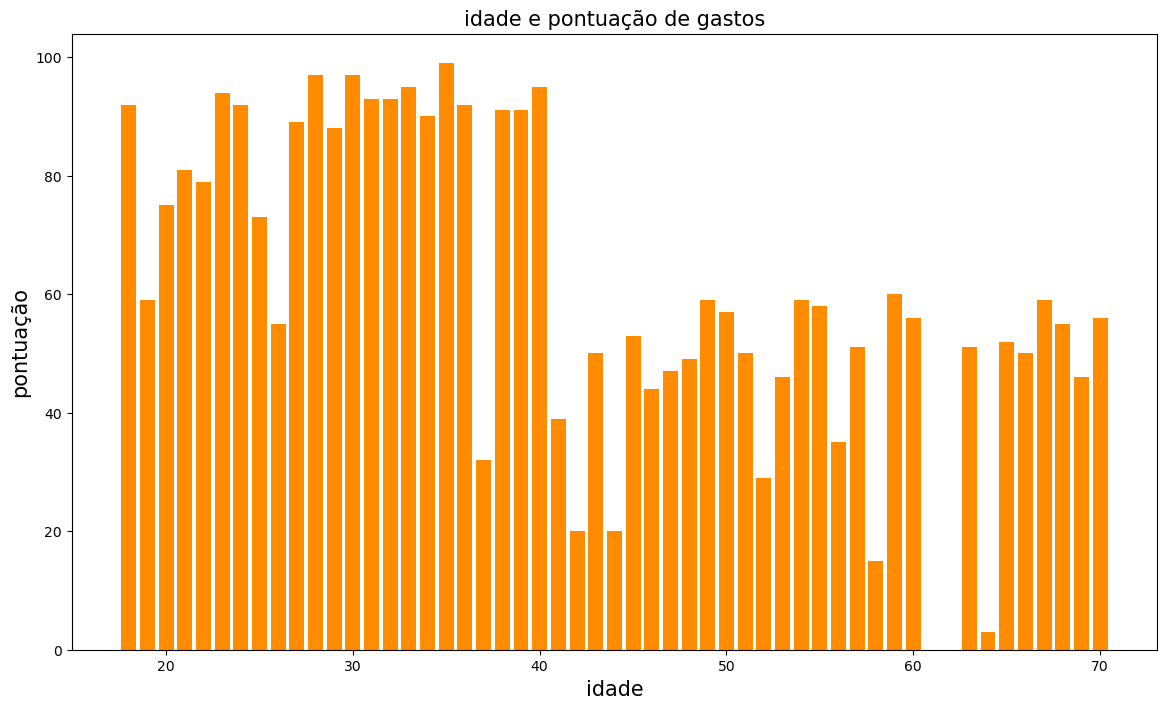

In [74]:
plt.figure(figsize=(14,8))                      #verificando a pontuação de gastos por idade  
plt.bar(df['Age'], df['Spending Score (1-100)'], color='darkorange')
plt.title('idade e pontuação de gastos', fontsize=15)
plt.xlabel('idade', fontsize=15)
plt.ylabel('pontuação', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Na analise entre a idade e a pontuação de gastos percebe-se que os clientes abaixo dos 40 anos possuem uma pontuação maior que os clientes de maior idade, a causa disso pode ser que os clientes mais jovens (especialmente as mulheres, como visto anteriormente) tendem a gastar mais no shopping e consequentemente conseguem uma pontuação maior

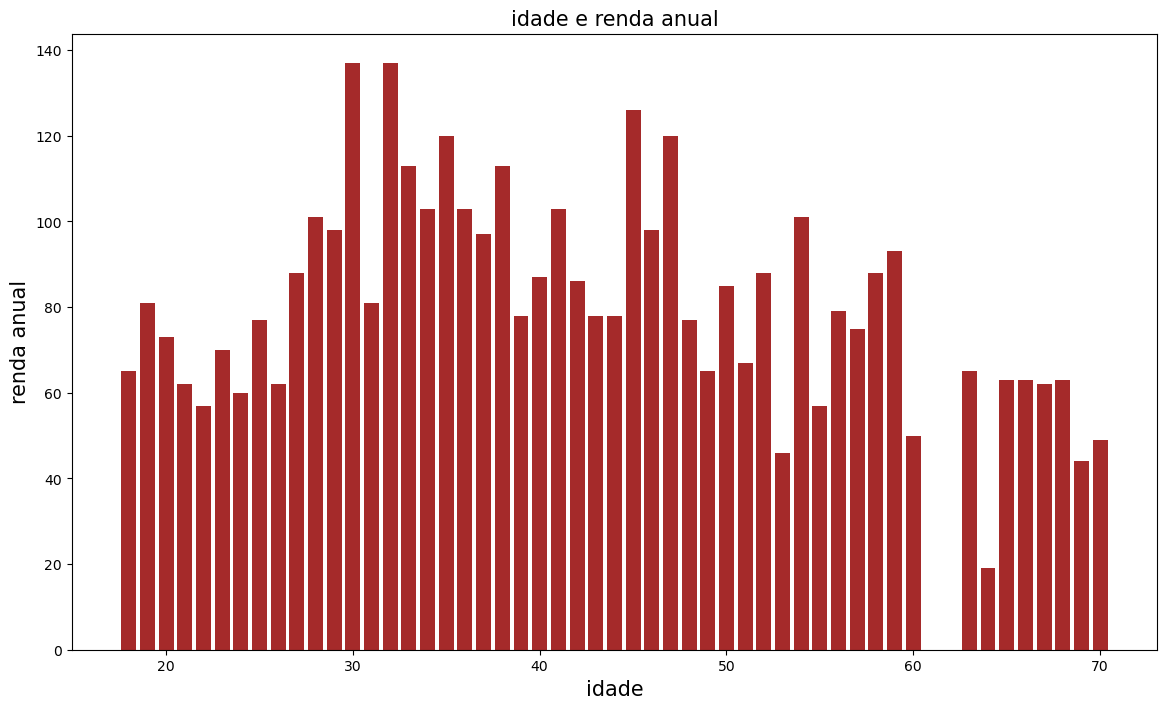

In [63]:
plt.figure(figsize=(14,8))                      #verificando a pontuação de gastos por idade  
plt.bar(df['Age'], df['Annual Income (k$)'], color='brown')
plt.title('idade e renda anual', fontsize=15)
plt.xlabel('idade', fontsize=15)
plt.ylabel('renda anual', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Na comparação entre a idade e a renda anual podemos ver que as pessoas com a maior renda estão na faixa dos 30 anos

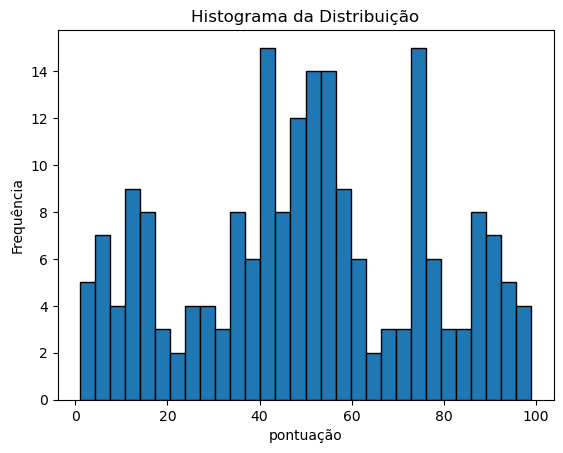

In [8]:
plt.hist(df['Spending Score (1-100)'], bins=30, edgecolor='black') #verificando o balanceamento dos dados.
plt.title('Histograma da Distribuição')
plt.xlabel('pontuação')
plt.ylabel('Frequência')
plt.show()

Os dados da coluna de pontuação de gastos estão um pouco desbalanceados, e isso é normal já que essa coluna atribui uma 'peso' diferente para cada cliente

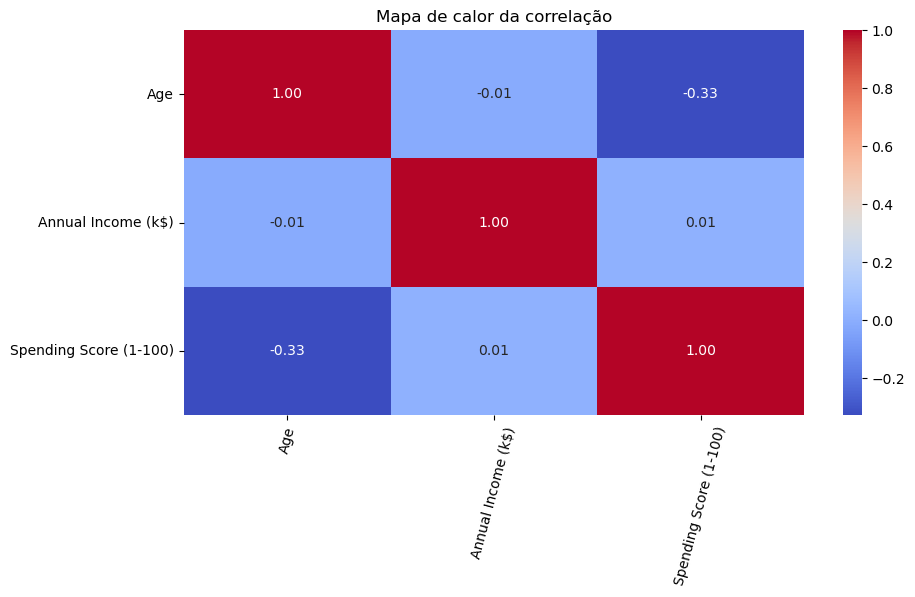

In [58]:
df = df.drop(['CustomerID'], axis=1)                           #exluindo a coluna de ID
df_correlacao = df.select_dtypes(include=['number']).corr()    #separando as colunas numericas e criando um mapa de calor para a correlação das variaveis
plt.figure(figsize=(10,5))
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

No mapa de calor existe uma correlação negativa entre a pontuação de gastos dos clientes e a idade, e isso confirma a analise bivariada visto acima, conforme a pontuação sobe a idade diminui e conforme a idade aumenta a pontuação tende a diminuir

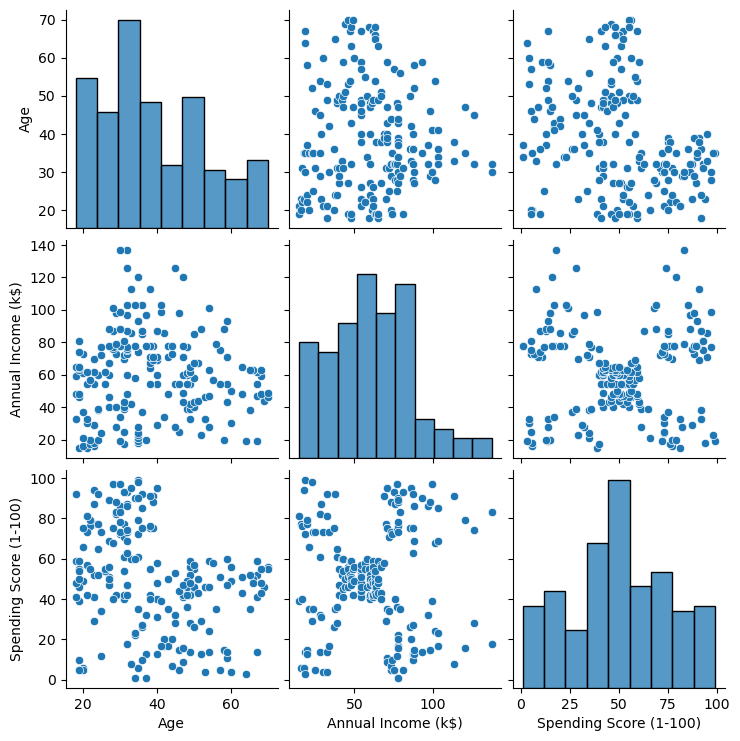

In [60]:
sns.pairplot(df)   #plotando a disperção dos dados

O gráfico de disperção mostra algumas aglomerações entre a pontuação e a renda anual, na pontuação e idade os dados estão mais disperços, por isso eu decidi usar o kmeans com esse par para tentar encontrar um conjunto de clusters

In [7]:
scaler = StandardScaler()                  #padronizando os dados das colunas numericas
df_padronizado = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])


In [35]:
kmeans_df_padronizado = KMeans(n_clusters=3, n_init=50, random_state=42)   #definindo os parametros e aplicando o KMeans
kmeans_df_padronizado.fit(df_padronizado) 


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, n_init=50, random_state=42)

In [37]:
centroide_padronizado = kmeans_df_padronizado.cluster_centers_         #invertendo os centroides padronizados para a forma original
centroide_original = scaler.inverse_transform(centroide_padronizado)


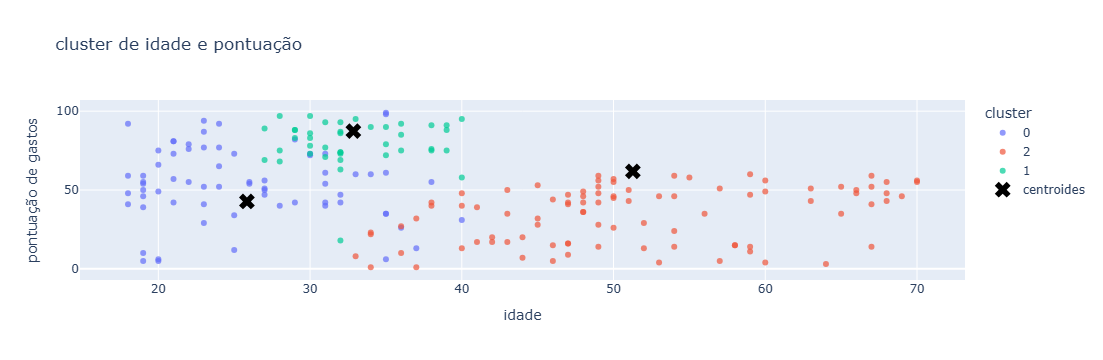

In [39]:
labels = kmeans_df_padronizado.labels_     #criando as labels do dataframe padronizado

df_clusters = pd.DataFrame({               #rotulando os clusters
    'idade': df['Age'],
    'pontuação de gastos': df['Spending Score (1-100)'],
    'clusters': labels.astype(str)
})
                                           #criando os pontos coloridos
fig=px.scatter(df_clusters, x='idade', y='pontuação de gastos', color='clusters', color_continuous_scale='viridis', opacity=0.7, title='cluster de idade e pontuação')
                                           #adicionando os centroides
fig.add_scatter(x=centroide_original[:, 0], y=centroide_original[:, 1], mode='markers', marker=dict(color='black', symbol='x', size=14), name='centroides')
fig.update_layout(xaxis_title='idade', yaxis_title='pontuação de gastos', legend_title='cluster')
fig.show()

In [41]:
df['clusters'] = labels             #criando a media de idade e pontuação de gastos

media_cluster = df.groupby('clusters')[['Age', 'Spending Score (1-100)']].mean()
media_cluster

,Age,Spending Score (1-100)
clusters,,
0,25.838235,53.647059
1,32.853659,79.975610
2,51.274725,34.208791


Olhando a media dos clusters gerados e comparando com os gráficos anteriores, os clientes mais velhos possuem renda e pontuação mais baixa então uma boa estrategia de marketing para esse público seria oferecer produtos mais básicos a preços acessíveis, recompensas por compras frequentes e descontos progressivos, os clientes mais jovens possuem renda e pontuação medianos então para eles poderia ser oferecido combinações de produtos populares, pacotes com desconto e brindes após certo valor acumulado, por último temos os clientes na faixa dos 30 anos com uma renda e pontuação alta, aqui poderia ser oferecido benefícios exclusivos, customização de alta qualidade e entrega em horário marcado com embalagem especial